In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


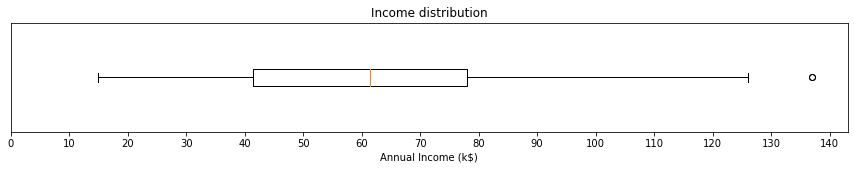

In [3]:
plt.figure(figsize=(15,2))
plt.boxplot(df['Annual Income (k$)'], vert=False)
plt.title('Income distribution')
plt.yticks([])
plt.xticks(range(0,150,10))
plt.xlabel('Annual Income (k$)')
plt.show()

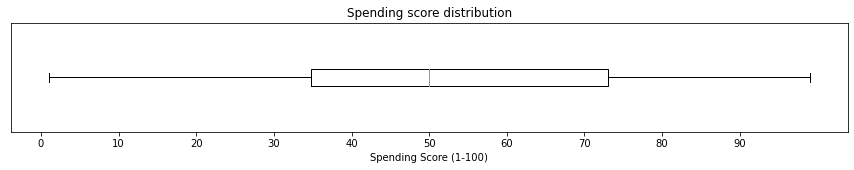

In [4]:
plt.figure(figsize=(15,2))
plt.boxplot(df['Spending Score (1-100)'], vert=False)
plt.title('Spending score distribution')
plt.yticks([])
plt.xticks(range(0,100,10))
plt.xlabel('Spending Score (1-100)')
plt.show()

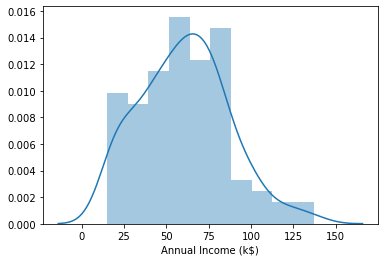

In [5]:
sns.distplot(df['Annual Income (k$)'])
plt.show()

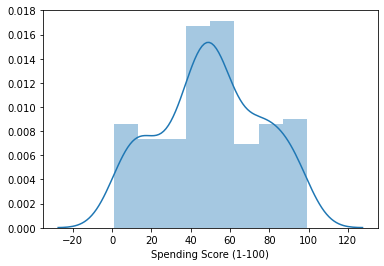

In [6]:
sns.distplot(df['Spending Score (1-100)'])
plt.show()

In [7]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

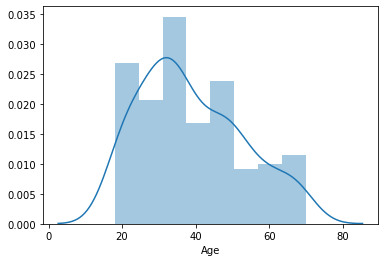

In [8]:
sns.distplot(df['Age'])
plt.show()

In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


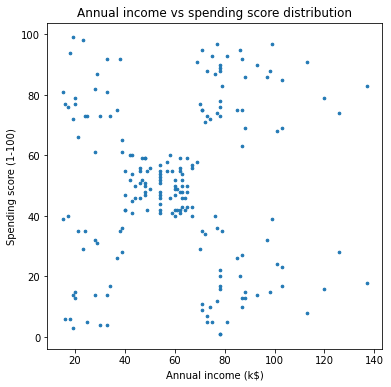

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=7)
plt.title('Annual income vs spending score distribution')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()

In [11]:
# Inisialisasi object KMeans
kmeans = KMeans(n_clusters=5, random_state=41)

# Memulai proses clustering
kmeans.fit(X)

KMeans(n_clusters=5, random_state=41)

In [12]:
# Memprediksi semua data
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [13]:
# Mengambil data cluster centers (pusat tiap cluster)
centroids = kmeans.cluster_centers_
print(centroids)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


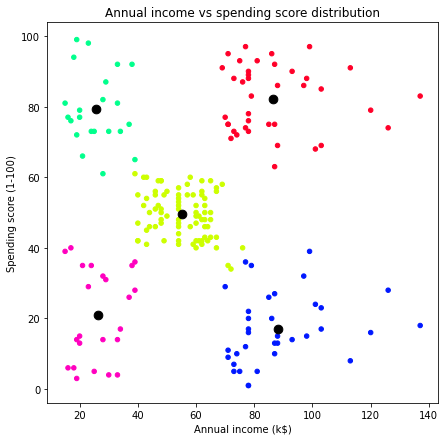

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], s=20, c=y_kmeans, cmap='gist_rainbow')
plt.scatter(centroids[:,0], centroids[:,1], s=75, c='black')
plt.title('Annual income vs spending score distribution')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()

In [15]:
# Buat data baru (kolom 1=annual income, kolom 2=spending score)
pred_data = np.array([[30,10],[70,50],[20,80],[100,80],[100,20],[20,20],[60,60]])
print(pred_data)

[[ 30  10]
 [ 70  50]
 [ 20  80]
 [100  80]
 [100  20]
 [ 20  20]
 [ 60  60]]


In [16]:
# Memprediksi class dari data-data baru di atas
predictions = kmeans.predict(pred_data)
print(predictions)

[4 1 2 0 3 4 1]


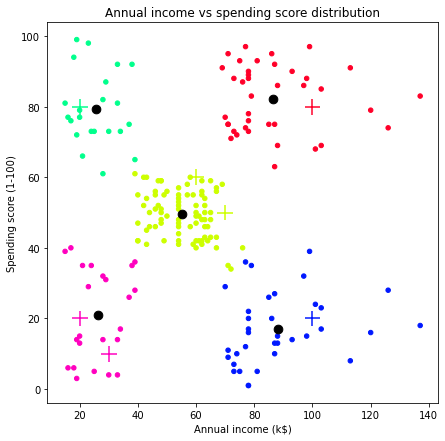

In [17]:
# Menampilkan data baru pada scatter plot
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], s=20, c=y_kmeans, cmap='gist_rainbow')
plt.scatter(pred_data[:,0], pred_data[:,1], s=250, c=predictions, cmap='gist_rainbow', marker='+')
plt.scatter(centroids[:,0], centroids[:,1], s=75, c='black')
plt.title('Annual income vs spending score distribution')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()

In [20]:
# Ngitung WCSS
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=41)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

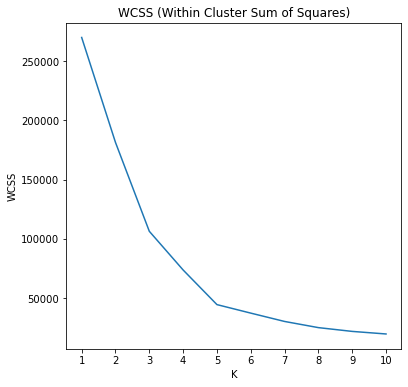

In [22]:
# Menampilkan graph WCSS untuk melakukan elbow method
plt.figure(figsize=(6,6))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()